In [1]:
import numpy as np # mostly used for array computing and for advanced mathematical functions.
import pandas as pd # imports pandas package, aliases as pd
import seaborn as sns

## Exploratory Data Analytics
###### Data exploration is one of the key tasks a data analyst performs


In [2]:
insurance_premium = pd.read_csv('insurance.csv')
insurance_premium.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance_premium.info() # prints information about a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance_premium.shape # gets the number of rows and columns

(1338, 7)

In [5]:
insurance_premium.describe() # gets descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


###### Checking dataset for missing values and valid entries

In [6]:
insurance_premium['smoker'].value_counts(dropna = False)

no     1064
yes     274
Name: smoker, dtype: int64

## Exploratory Visualization

### Histograms to visualize frequences and distributions

In [7]:
import matplotlib.pyplot as plt

- The bins help to specify the edges to the bars of the histogram
- The more bins we set the more bars appear on a histogram
- The higher the number of observations in a range, the more prominent are the bars (bins) of the histogram

#### Histograms of individuals' ages

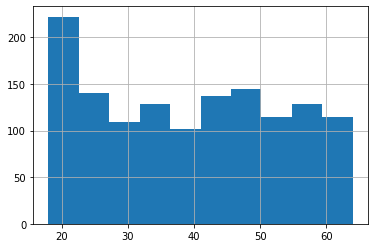

In [8]:
insurance_premium['age'].hist(); # using Pandas to visualise age

The sample had similar amounts of people of different ages (not normal distribution).

The plot above is built with just Pandas. I also made it with Seaborn.

In [9]:
import seaborn as sns #import seanborn
# make the seaborn plots have a grey background
sns.set(rc={'axes.facecolor':'Gainsboro', 'figure.facecolor':'Gainsboro'})

- The `.distplot()` function in Seaborn is used to create a standard,histogram and customize the number of the bins to further,understand how the values are distributed.
- The dist aproach is also a powerful tool for analyzing data quickly.

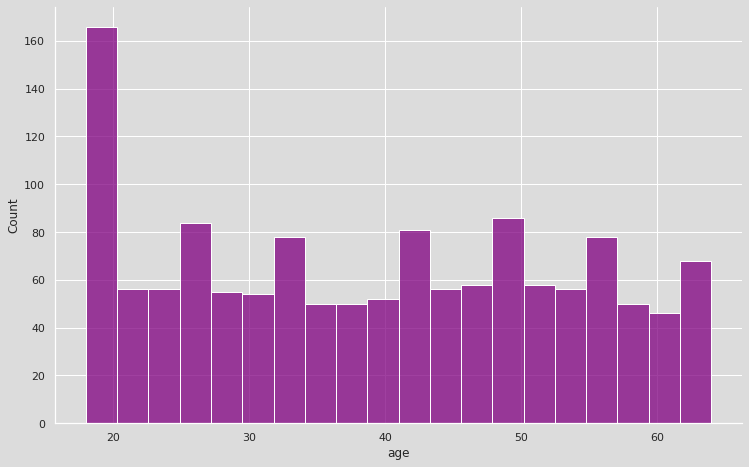

In [10]:
g = sns.displot(insurance_premium['age'],
            color="purple",
            kde=False, # disables kde
            bins=20)
g.fig.set_figwidth(12) # increases the width of Seaborn chart
g.fig.set_figheight(7) # increases the height of Seaborn chart

#### Histograms of individuals' BMIs

Seaborn `.distplot()` automatically assigns label on the x-axis, it also mutes the color palette, allows for KDE (Kernel Density Estimate) plot, it narrows the bins to fit the parameters of the plot. KDE is smooth, unlike a histogram and easy to analyse.

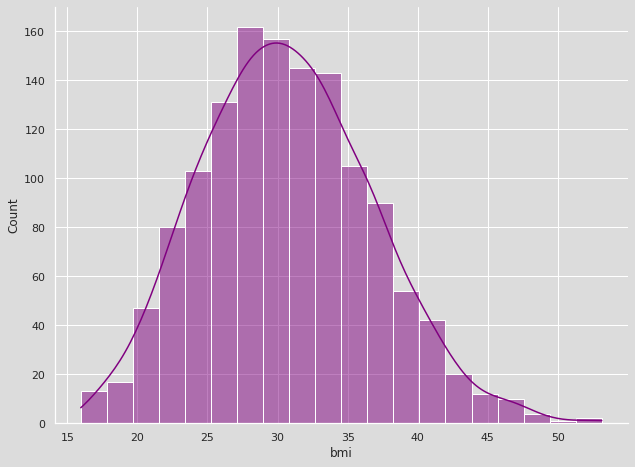

In [11]:
g = sns.displot(insurance_premium['bmi'],
            color="purple",
            kde=True,
            bins=20)
g.fig.set_figwidth(10) # increases the width of Seaborn chart
g.fig.set_figheight(7) # increases the height of Seaborn chart

The BMI is normally distributed with the majority of observations in the middles range.

#### Histograms of individuals' insurance premiums

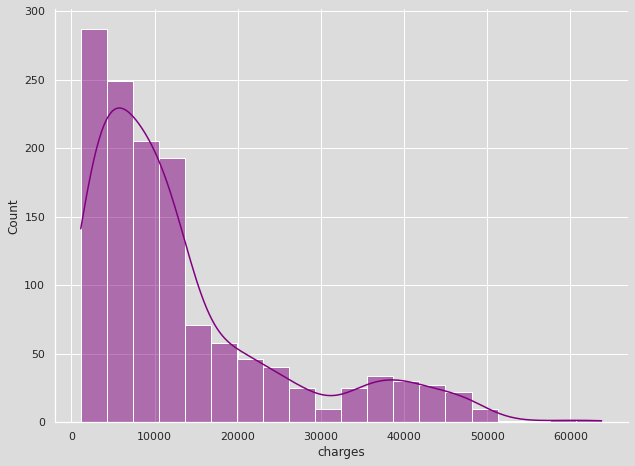

In [12]:
g = sns.displot(insurance_premium['charges'],
            color="purple",
            kde=True,
            bins=20)
g.fig.set_figwidth(10) # increases the width of Seaborn chart
g.fig.set_figheight(7) # increases the height of Seaborn chart

The distplots above show that the distribution of charges is right-skewed showing that majority of observations have insurance charges below $10,000

## Visualising distribution with beeswarm plots

The beeswarm plot plots all the data points. It plots the data on one axis and then offsets in the other direction to show volume or counts.

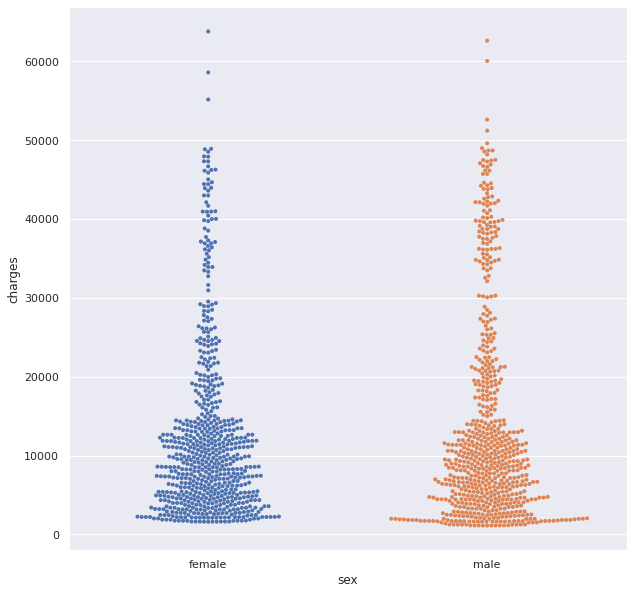

In [13]:
sns.set()
ax, fig = plt.subplots(figsize=[10,10]) # sets figure size
sns.swarmplot(x = 'sex',
              y = 'charges',
              data=insurance_premium, 
              s=4)
plt.xlabel('sex')
plt.ylabel('charges')
plt.show()

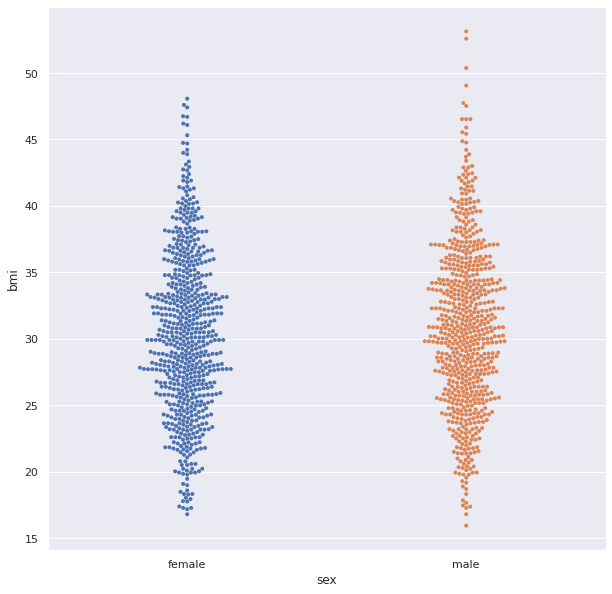

In [14]:
ax, fig = plt.subplots(figsize=[10,10]) # sets figure size
sns.swarmplot(x = 'sex', y = 'bmi',data=insurance_premium,s=4)
plt.xlabel('sex')
plt.ylabel('bmi');
plt.show()

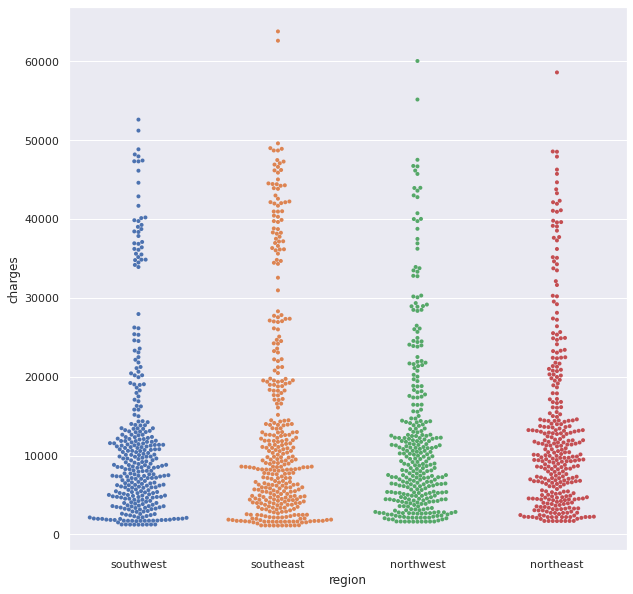

In [15]:
ax, fig = plt.subplots(figsize=[10,10]) # sets figure size
sns.swarmplot(x='region', y ='charges', data=insurance_premium, s=4)
plt.xlabel('region')
plt.ylabel('charges')
plt.show();

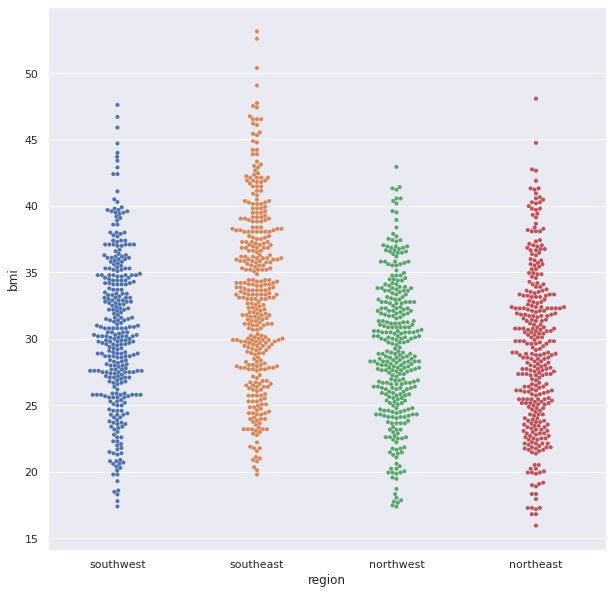

In [16]:
ax, fig = plt.subplots(figsize=[10,10]) # sets figure sizeax, fig = plt.subplots(figsize=[10,10]) # sets figure size
sns.swarmplot(x ='region', y ='bmi',s=4, data=insurance_premium)
plt.xlabel('region')
plt.ylabel('bmi')
plt.show()

# Box Plot
Box Plots show the distribution of quantitative data to view the median, spread, skewness, and the outlier for easy comparisons between groups

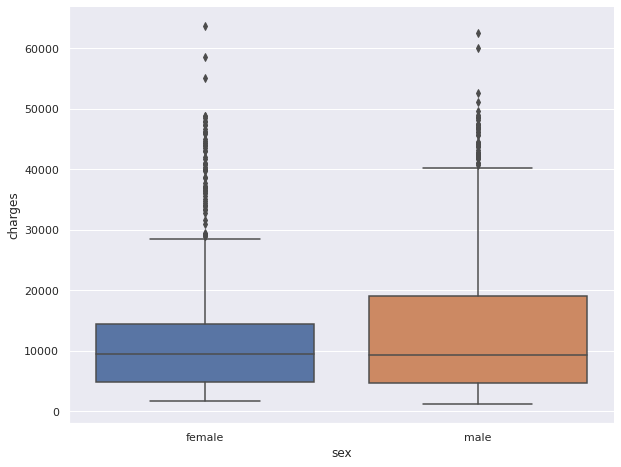

In [17]:
g = sns.catplot(x='sex', y='charges',
             data=insurance_premium,
             kind='box')
g.fig.set_figwidth(10) # increases the width of Seaborn chart
g.fig.set_figheight(7) # increases the height of Seaborn chart
plt.show()

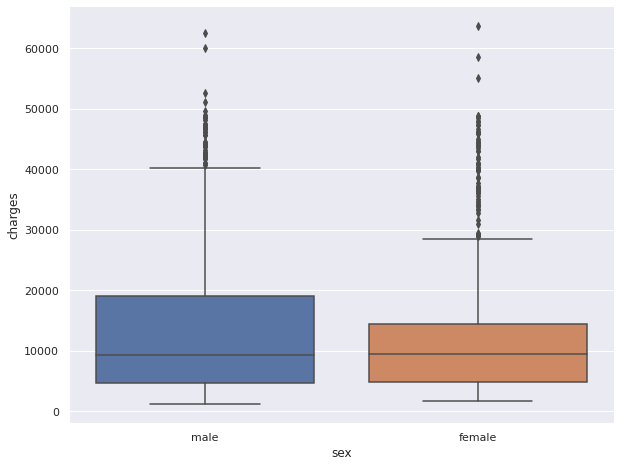

In [18]:
g=sns.catplot(x='sex', y='charges',
             data=insurance_premium,
             kind='box',
             order=['male','female'])
g.fig.set_figwidth(10) # increases the width of Seaborn chart
g.fig.set_figheight(7) # increases the height of Seaborn chart
plt.show()

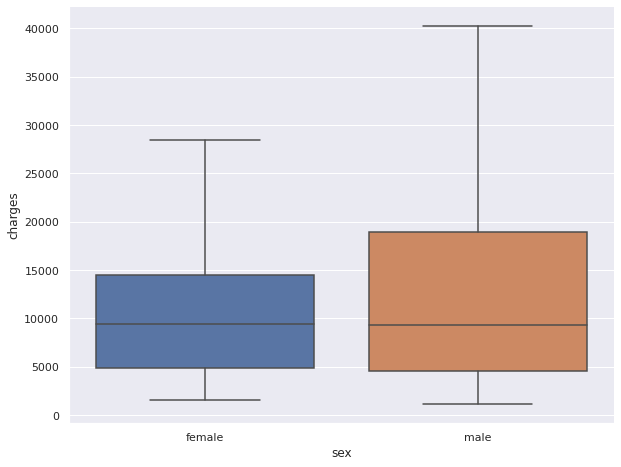

In [19]:
g=sns.catplot(x='sex', y='charges',
             data=insurance_premium,
             kind='box',
             sym='') # use sym to omit the outlier or to change the appearance instead of omitting them
g.fig.set_figwidth(10) # increases the width of Seaborn chart
g.fig.set_figheight(7) # increases the height of Seaborn chart
plt.show()

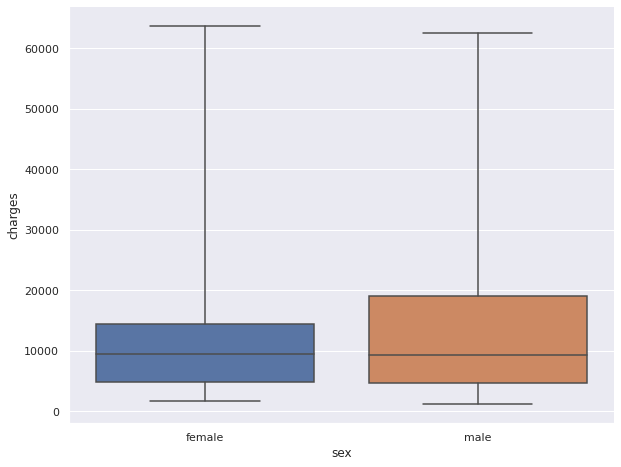

In [20]:
g=sns.catplot(x='sex', y='charges',
             data=insurance_premium,
             kind='box',
             whis=[0,100]) # whis can be use to change the appearance instead of omitting the outlier completely
g.fig.set_figwidth(10) # increases the width of Seaborn chart
g.fig.set_figheight(7) # increases the height of Seaborn chart
plt.show()

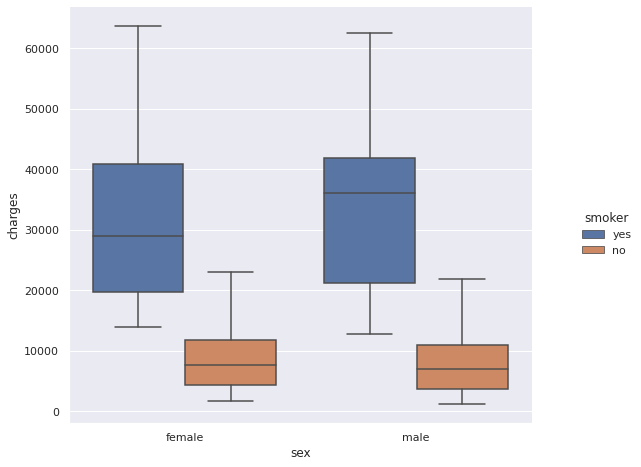

In [21]:
g=sns.catplot(x='sex', y='charges',
              data=insurance_premium,
              kind='box',
              hue='smoker',
              sym='')
g.fig.set_figwidth(10) # increases the width of Seaborn chart
g.fig.set_figheight(7) # increases the height of Seaborn chart
plt.show()

### Reshaping the data using aggregate functions and `groupby`

In [22]:
grouped_insurance_premium = insurance_premium.groupby('region', as_index=False)['charges'].mean() # creates a new data frame with regions as new rows and means of carges as values
grouped_insurance_premium.columns = grouped_insurance_premium.columns.str.replace('charges', 'mean_charges') # renames charges into mean_charges
grouped_insurance_premium['median_charges'] = insurance_premium.groupby('region', as_index=False)['charges'].median()['charges'] # adds a new column with median charges
grouped_insurance_premium['max_charges'] = insurance_premium.groupby('region', as_index=False)['charges'].max()['charges'] # adds a new column with maximum charges
grouped_insurance_premium['max_charges'] = insurance_premium.groupby('region', as_index=False)['charges'].min()['charges'] # adds a new column with minimum charges
grouped_insurance_premium['mean_bmi'] = insurance_premium.groupby('region', as_index=False)['bmi'].mean()['bmi']
grouped_insurance_premium['num_children'] = insurance_premium.groupby('region', as_index=False)['children'].mean()['children']
grouped_insurance_premium

,region,mean_charges,median_charges,max_charges,mean_bmi,num_children
0,northeast,13406.384516,10057.652025,1694.7964,29.173503,1.046296
1,northwest,12417.575374,8965.795750,1621.3402,29.199785,1.147692
2,southeast,14735.411438,9294.131950,1121.8739,33.355989,1.049451
3,southwest,12346.937377,8798.593000,1241.5650,30.596615,1.141538


In [23]:
insurance_premium.head(1) # checking that the original dataframe is the same as it was and was not affected by the grouping by

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


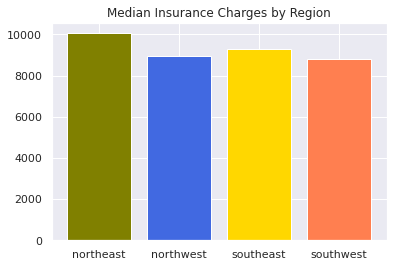

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure()
x = grouped_insurance_premium['region']
y = grouped_insurance_premium['median_charges']
colors = [ 'olive', 'royalblue', 'gold','coral']
plt.bar(x,y, color = colors)
plt.title("Median Insurance Charges by Region")
plt.show()

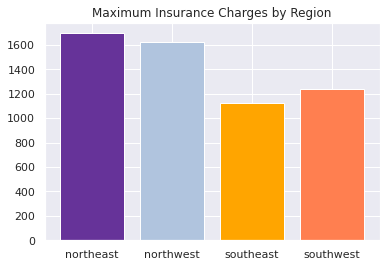

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure()
x = grouped_insurance_premium['region']
y = grouped_insurance_premium['max_charges']
colors = [ 'RebeccaPurple', 'LightSteelBlue', 'Orange','coral']
plt.bar(x,y, color = colors)
plt.title("Maximum Insurance Charges by Region")
plt.show()

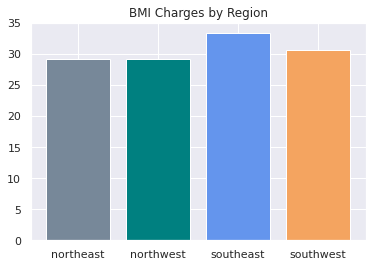

In [26]:
fig = plt.figure()
x = grouped_insurance_premium['region']
y = grouped_insurance_premium['mean_bmi']
colors = ['LightSlateGray', 'Teal', 'CornflowerBlue','SandyBrown']
plt.bar(x,y, color = colors)
plt.title("BMI Charges by Region")
plt.show()

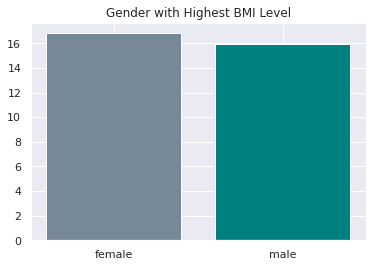

In [27]:
fig = plt.figure()
grouped_insurance_premium_1 = insurance_premium.groupby('sex', as_index=False)['bmi'].min()
x = grouped_insurance_premium_1['sex']
y = grouped_insurance_premium_1['bmi']
color = ['Pink', 'LightSlateGray']
plt.bar(x,y, color = colors)
plt.title("Gender with Highest BMI Level")
plt.show()

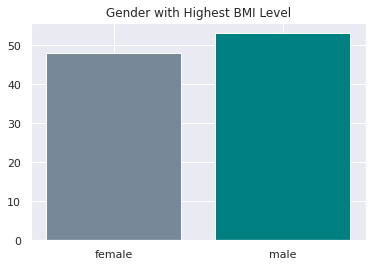

In [28]:
fig = plt.figure()
grouped_insurance_premium_1 = insurance_premium.groupby('sex', as_index=False)['bmi'].max()
x = grouped_insurance_premium_1['sex']
y = grouped_insurance_premium_1['bmi']
color = ['Pink', 'LightSlateGray']
plt.bar(x,y, color = colors)
plt.title("Gender with Highest BMI Level")
plt.show()

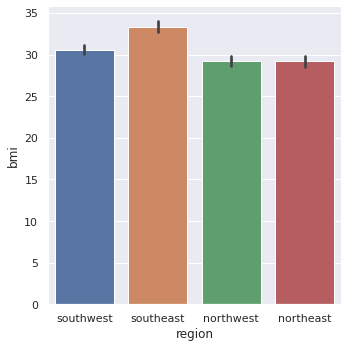

In [29]:
sns.catplot(x='region', y='bmi', # catplot specifies the categorical variable 'region' on the x-axis and the quantitative variable 'bmi' on the y-axis
              data=insurance_premium,
              kind='bar')
plt.show()

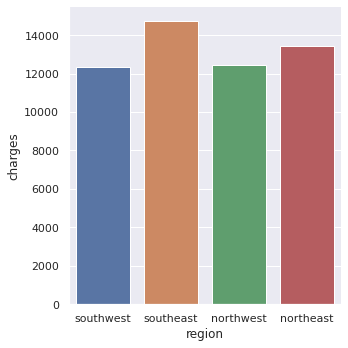

In [30]:
sns.catplot(x='region', y='charges', 
              data=insurance_premium,
              kind='bar',
              ci=None) # the confidence 'ci' level of the mean can be turned off by using ci=none
plt.show()

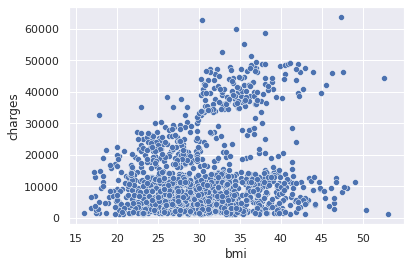

In [31]:
sns.scatterplot(x='bmi', y='charges', 
                data=insurance_premium)
plt.show()

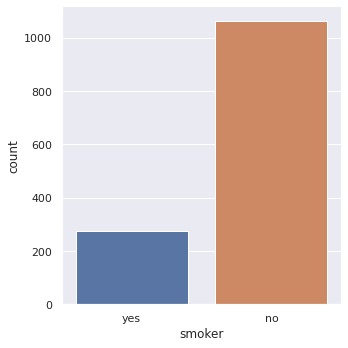

In [32]:
sns.catplot(x='smoker', 
              data=insurance_premium,
              kind='count')
plt.show()

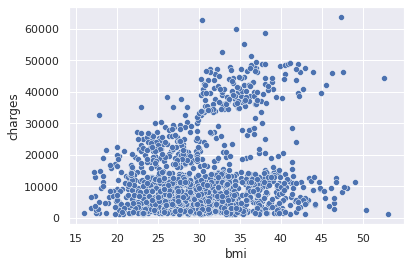

In [33]:
sns.scatterplot(x='bmi', y='charges', data=insurance_premium)
plt.show()

# Relationship plots

### To see relationship between two quantitative variables

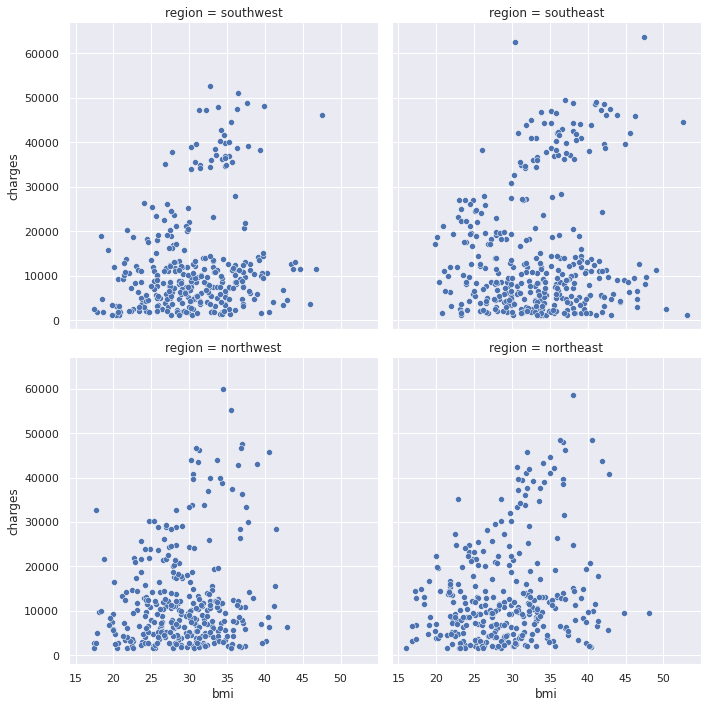

In [34]:
sns.relplot(x='bmi', y='charges',
            data=insurance_premium,
            kind='scatter', # 
            col='region',
            col_wrap=2)

plt.show()

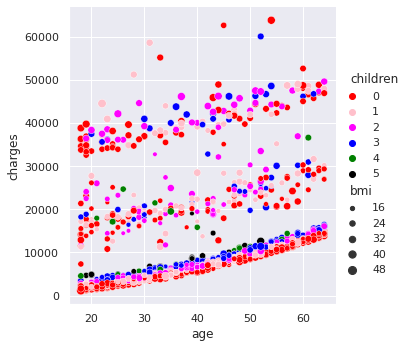

In [35]:
sns.relplot(x='age', y='charges',
            data=insurance_premium,
            kind='scatter',
            size='bmi', # point on the scatter plot to be sized based on the number of people in the region
            hue='children',
            palette=["red", "pink", "magenta","blue", "green", "black"]
            ) # helps to display regions with larger BMI charges with larger and darker color shades
plt.show()


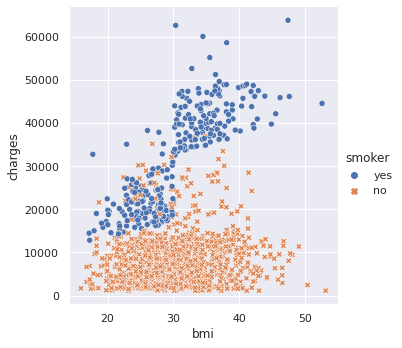

In [36]:
sns.relplot(x='bmi', y='charges',
            data=insurance_premium,
            kind='scatter',
            hue='smoker', 
            style='smoker') # styles ='' allows to better distinguish the groups by plotting smokers with a different point style in addition with a different color

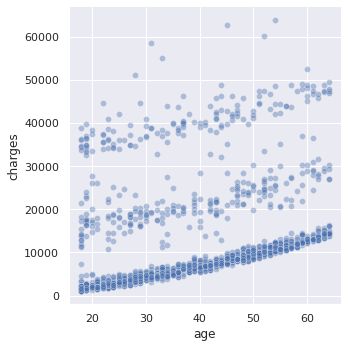

In [37]:
sns.relplot(x='age', y='charges',
            data=insurance_premium,
            kind='scatter',
            alpha=0.4) # point Transparency to see which areas of the scatter plot has more or less observations
plt.show()

# Point plot 
### Use catplot - categorical 

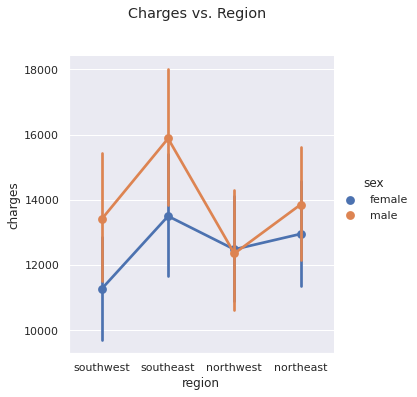

In [38]:
g = sns.catplot(x='region', y='charges',
            data=insurance_premium,
            hue='sex',
            kind='point')
g.fig.suptitle('Charges vs. Region', y=1.1) 
plt.show()

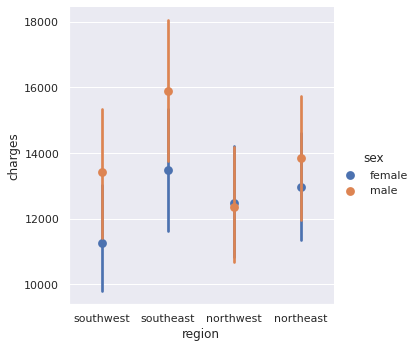

In [39]:
sns.catplot(x='region', y='charges',
            data=insurance_premium,
            hue='sex',
            kind='point',
            join=False) # use join to remove the lines connecting each points to help compare within the category group
plt.show()

## Heatmap

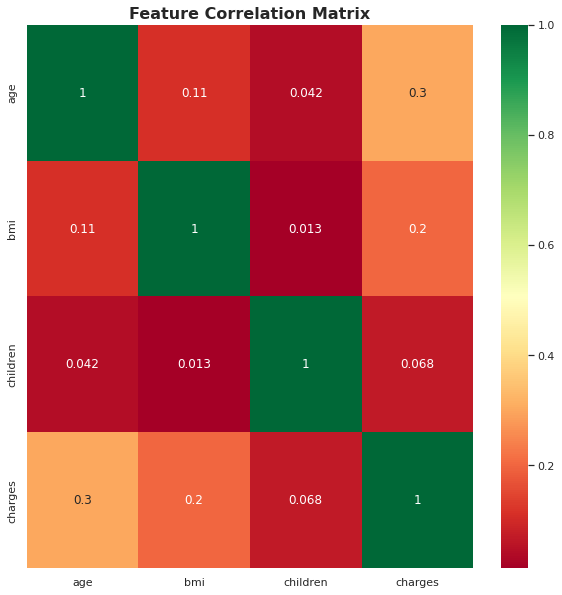

In [40]:
corr_matrix = insurance_premium.corr()
plt.figure(figsize=[10, 10])
sns.heatmap(corr_matrix, annot=True, cmap="RdYlGn")
plt.title("Feature Correlation Matrix", fontweight="bold", fontsize=16)
plt.show()

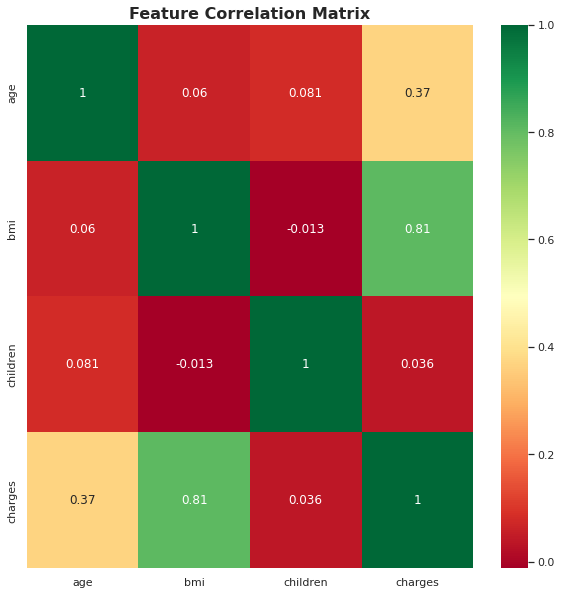

In [41]:
corr_matrix = insurance_premium[insurance_premium['smoker']=='yes'].corr()
plt.figure(figsize=[10, 10])
sns.heatmap(corr_matrix, annot=True, cmap="RdYlGn")
plt.title("Feature Correlation Matrix", fontweight="bold", fontsize=16)
plt.show()

In [42]:
insurance_premium_numeric = insurance_premium.copy()[:]
insurance_premium_numeric.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [43]:
insurance_premium_numeric["sex"] = insurance_premium_numeric.sex.map({"male": 0, "female": 1})
insurance_premium_numeric["smoker"] = insurance_premium_numeric.smoker.map({"yes": 1, "no": 0})
insurance_premium_numeric["region"] = insurance_premium_numeric.region.map(
    {"southwest": 0, "southeast": 1, "northwest": 2, "northeast": 3}
)

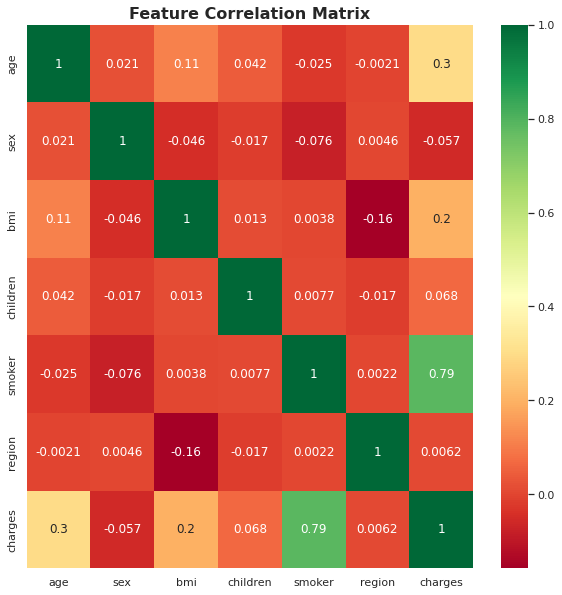

In [44]:
corr_matrix = insurance_premium_numeric.corr()
plt.figure(figsize=[10, 10])
sns.heatmap(corr_matrix, annot=True, cmap="RdYlGn")
plt.title("Feature Correlation Matrix", fontweight="bold", fontsize=16)
plt.show()

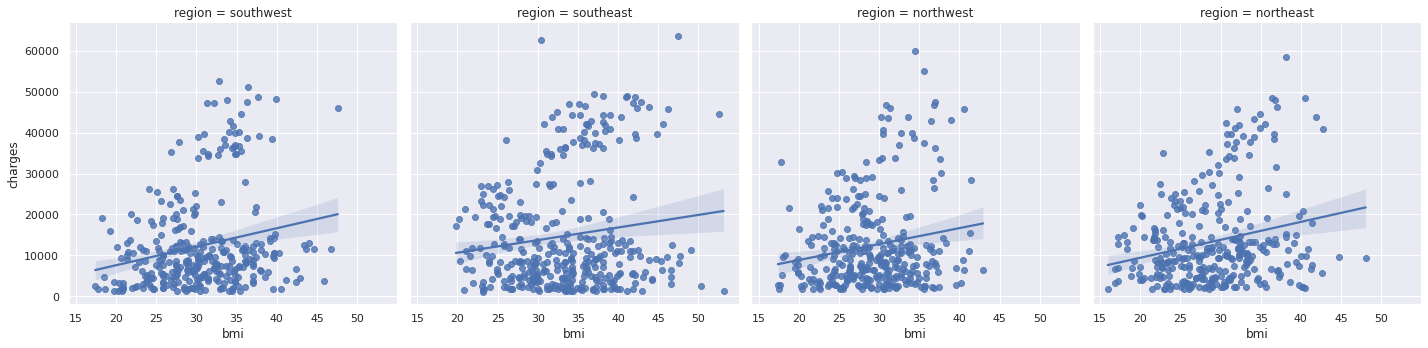

In [45]:
sns.lmplot(data=insurance_premium,
           x='bmi',
           y='charges',
           col='region')

plt.show()

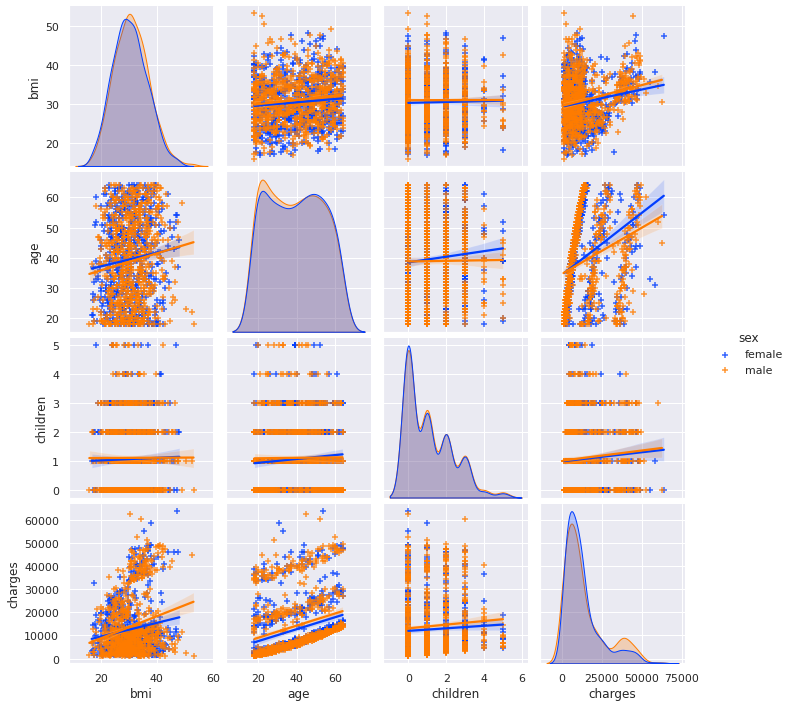

In [46]:
sns.pairplot(data=insurance_premium,
             vars=["bmi", "age","children","charges"],
             kind='reg',
             markers='+',
             palette='bright',
             diag_kind = 'kde',
             hue='sex')

plt.show()

`.pairplot()` above allows interactions across different columns of data. It helps to build plots to show relationships between two data elements. It also helps to define the type of plots that can be displayed on the diagonals. The map helps to define function for the main diagonal and the map_off to the define the function for the other diagonal.

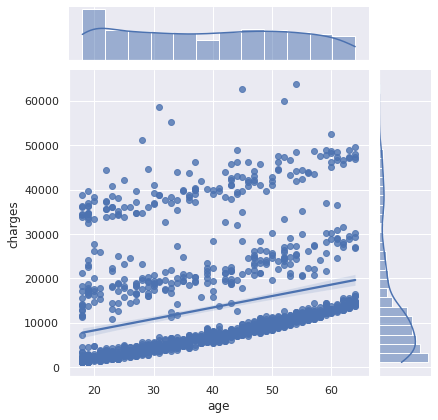

In [47]:
sns.jointplot(x="age",
        y="charges",
        kind='reg',
        data=insurance_premium)

plt.show()

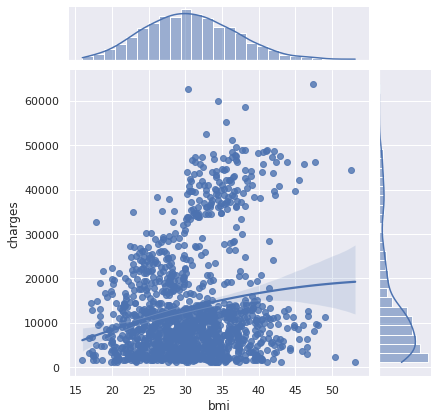

In [48]:
sns.jointplot(x="bmi",
        y="charges",
        kind='reg',
        order=2,
        data=insurance_premium)

plt.show()

## Data Cleaning & Preprocessing for building Machine Learning models.

### Identifying missing values

Missing values often cause problems when we create machine learning models.

The easiest way for Pandas to identify missing values is a with `.isnull()` function.
`.isnull()` returns true when at least one missing values is present. `True+True` in Python is 1. Hence, if there are any missing values the command below returns >0.

In [49]:
insurance_premium.isnull().sum().sum()

0

### Counting values including missing values

From the code output above we can conclude that there aren't any missing values in our data set, so it is all perfectly ready for making Machine Learning models. However, for the sake of learning more about data preparation for the modelling with Machine Learning I did some counting of values as well.

#### Counting values including NaNs for categorical variables: sex, region, smoker.

In [50]:
insurance_premium.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [51]:
insurance_premium['sex'].value_counts(dropna=False)

male      676
female    662
Name: sex, dtype: int64

In [52]:
insurance_premium['region'].value_counts(dropna=False)

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

#### Counting values would also work for the quantitative discrete variable: children. 👶👶👶👶

In [53]:
insurance_premium['children'].value_counts(dropna=False)

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

#### For continuous variables: money 💰💵 , bmi and age we can see if tthe following subsetting returns empty tables.

In [54]:
insurance_premium[(insurance_premium['charges']==0) | (insurance_premium['charges'].dtype != 'float')]

,age,sex,bmi,children,smoker,region,charges


In [55]:
insurance_premium[(insurance_premium['bmi']==0) | (insurance_premium['bmi'].dtype != 'float')]

,age,sex,bmi,children,smoker,region,charges


In [56]:
print(insurance_premium['bmi'].dtype) # checking the data type for tthe bmi colum just to make sure

float64


In [57]:
print(insurance_premium['age'].dtype)

int64


In [58]:
insurance_premium[(insurance_premium['age']==0) | (insurance_premium['age'].dtype != 'int')]

,age,sex,bmi,children,smoker,region,charges


To conclude, there are no missing values in the dataset.

## Separating features and the target

In the dataset the target (insurance premium) is in the last column. Therefore, `.iloc[:, -1]` can be used to get the last column into separate *numpy arrays.*

Machine Learning models forom `sklearn` take unlabelled numpy arrays as parameters.

Conventionally, independent variables or features are called X and the target or dependent variable is called y.

In [59]:
X = insurance_premium.iloc[:, :-1].values # puts features into a numpy array
y = insurance_premium.iloc[:, -1].values # puts target into a numpy array

In [60]:
X

array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 'female', 36.85, 0, 'no', 'southeast'],
       [21, 'female', 25.8, 0, 'no', 'southwest'],
       [61, 'female', 29.07, 0, 'yes', 'northwest']], dtype=object)

In [61]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

## Encoding categorical data

One-hot encoding turns **categorical data** into numerical data in binary format. If a feature is represented in that column, it receives a 1, otherwise it gets a zero.

Encoding categorical data is done so that the categorical data can be fed to the model as machines do not understand words such as 'Male' or 'Female.'

In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,4,5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [63]:
insurance_premium.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [64]:
X[0]

array([1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 19, 27.9, 0], dtype=object)

In [65]:
X[0]

array([1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 19, 27.9, 0], dtype=object)

## Splitting the dataset into the Training set and Test set

This process is done to calculate accuracy scores for the model

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [67]:
# When run this line will print traning and testing sets
# X_train, X_test, y_train, y_test

## Training the Multiple Linear Regression model on the Training set

As I have concluded from doing data visualisations and exploratory data analysis I need a linear model. As I am tyring to predict the premium, I will use linear regression.

I chose to use [sklearn](https://scikit-learn.org/stable/) model as we studied them in class and I was confident they were simple enough for me.

In [68]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # instantiates the model
regressor.fit(X_train, y_train) # trains the model

LinearRegression()

## Predicting the Test set results

This is doen to assess accuracy of the model

In [69]:
# show predicted and an actual y value from the test set
y_pred = regressor.predict(X_test)
for i in range(0,3):
    print("predicted ",round(y_pred[i],2),',','actual premium was',round(y_test[i],2))

predicted  11169.93 , actual premium was 9724.53
predicted  9486.71 , actual premium was 8547.69
predicted  38181.12 , actual premium was 45702.02


## Estimating accuracy wih R2

Linear regression calculates an equation that minimizes the distance between the fitted line and the data points. This is known as OLS - ordinary least squares. For my model I use mutivariate OLS regression model.

Ordinary least squares (OLS) regression minimizes the sum of the squared residuals, the distance from different data points and the calculated line of best fit.

In [70]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('R2 Score for Linear Regression on test data: {}'.format( np.round(r2_score(y_test, y_pred), 3)))

R2 Score for Linear Regression on test data: 0.8


The result means that 80% of the variation in the output variable is explained by the input variables.

In [71]:
insurance_premium.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


## Separating features and the target and dropping columns on `insurance_premium_numeric`

I decided to drop some columns to make input for predicting individual premium and also to avoid using `OneHotEncoder`.

In [72]:
insurance_premium_numeric = insurance_premium_numeric.drop(['sex','children','region'], axis='columns')

insurance_premium_numeric

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,0,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [73]:
X = insurance_premium_numeric.iloc[:, :-1].values # X= independent variables, 
y = insurance_premium_numeric.iloc[:, -1].values # y= dependent variable (charges)

`.values` helps to remove column headings from the dataframe because we can only feed machine learning numbers, not words.
`.iloc()` allows to subset. X will hold all the values from all columns except for the last one. y will hold values only from the last column.

In [74]:
X,y # print X, y to see that they are numpy arrays without column labels

(array([[19.  , 27.9 ,  1.  ],
        [18.  , 33.77,  0.  ],
        [28.  , 33.  ,  0.  ],
        ...,
        [18.  , 36.85,  0.  ],
        [21.  , 25.8 ,  0.  ],
        [61.  , 29.07,  1.  ]]),
 array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
        29141.3603]))

In [75]:
from sklearn.model_selection import train_test_split # to import the module that splits data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # to measure accuracy

In [76]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() # instantiates the model
regressor.fit(X_train, y_train) # trains the model

LinearRegression()

In [77]:
# show predicted and an actual y value from the test set
y_pred = regressor.predict(X_test)
for i in range(0,3):
    print("predicted ",round(y_pred[i],2),',','actual premium was',round(y_test[i],2))

predicted  11513.77 , actual premium was 9724.53
predicted  9961.44 , actual premium was 8547.69
predicted  37446.72 , actual premium was 45702.02


In [78]:
from sklearn import metrics
from sklearn.metrics import r2_score # r2 measure of accuracy that our lines explains about 80% of variance 0.795

print('R2 Score for Linear Regression on test data: {}'.format( np.round(r2_score(y_test, y_pred), 3)))

R2 Score for Linear Regression on test data: 0.795


## Predicting insurance premium

In [ ]:
user_age = int(input("enter your age"))

In [ ]:
user_bmi = float(input("enter your bmi"))

In [ ]:
user_smoker = int(input("enter if you smoke or not: 1 for yes or 0 for no"))

In [ ]:
user_data = np.array([[user_age, user_bmi, user_smoker]]) # individual user inputs are comgbined into a 2D numpy array
user_data

array([[50., 30.,  0.]])

In [ ]:
y_new = regressor.predict(user_data) # the individual user input is calculated to estimate premium charges

In [ ]:
print("Your estimated insurance premium is $"+ str(round(y_new[0],2)))

Your estimated insurance premium is $10935.32


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=04eeb7cc-c014-42cc-9688-959f70fd96bb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>